In [37]:
%matplotlib inline

# EDA

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [39]:
df = pd.read_csv('C:\\Users\\DELL\\End-to-End-Deployment-Model-Of-House-Price-Prediction\\india_housing_prices.csv')
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [41]:
df.shape

(250000, 23)

In [42]:
df.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [43]:
df.duplicated().sum()   # return count of duplicate values

np.int64(0)

In [44]:
df['Price_in_Lakhs'] = df['Price_in_Lakhs'] * 100000  # Convert price to actual value

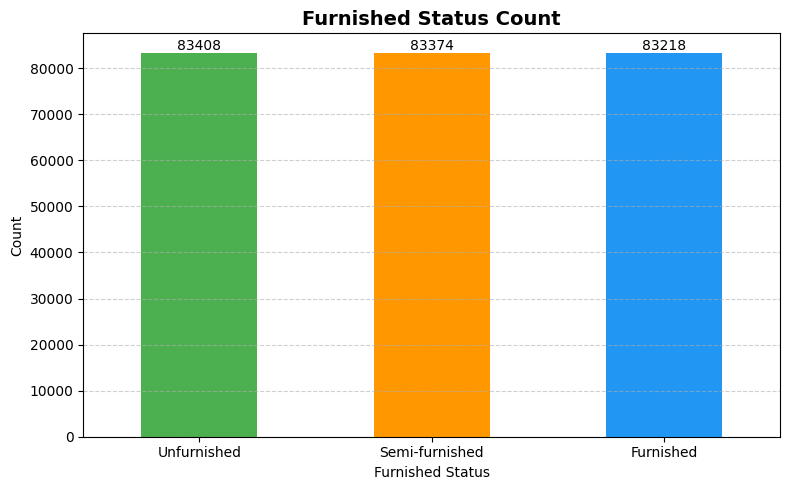

In [45]:
colors = ['#4CAF50', '#FF9800', '#2196F3']  # green, orange, blue

plt.figure(figsize=(8, 5))
ax = df['Furnished_Status'].value_counts().plot(
    kind='bar',
    color=colors
)

plt.title('Furnished Status Count', fontsize=14, fontweight='bold')
plt.xlabel('Furnished Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Value labels
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

In [46]:
df['Furnished_Status'] = df['Furnished_Status'].str.strip().str.title()

In [47]:
Target_col = 'Price_in_Lakhs'

Identify Feature Types and Exclude Non-Predictive Columns

In [48]:
# Separate Feature Types
feature_cols = [col for col in df.columns if col != Target_col]
categorical_cols = df[feature_cols].select_dtypes(include='object').columns.tolist()
numerical_cols = df[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'Categorical Columns: {categorical_cols}')
print(f'Numerical Columns: {numerical_cols}')

Categorical Columns: ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']
Numerical Columns: ['ID', 'BHK', 'Size_in_SqFt', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals']


In [49]:
# Exclude Non-Predictive columns
ID_LIKE = ['id', 'index', 'code']

numerical_cols = [
    col for col in numerical_cols
    if not any(key in col.lower() for key in ID_LIKE)
]
print(f'Numerical Columns: {numerical_cols}')

Numerical Columns: ['BHK', 'Size_in_SqFt', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals']


Correlation Heatmap for Numeric Columns

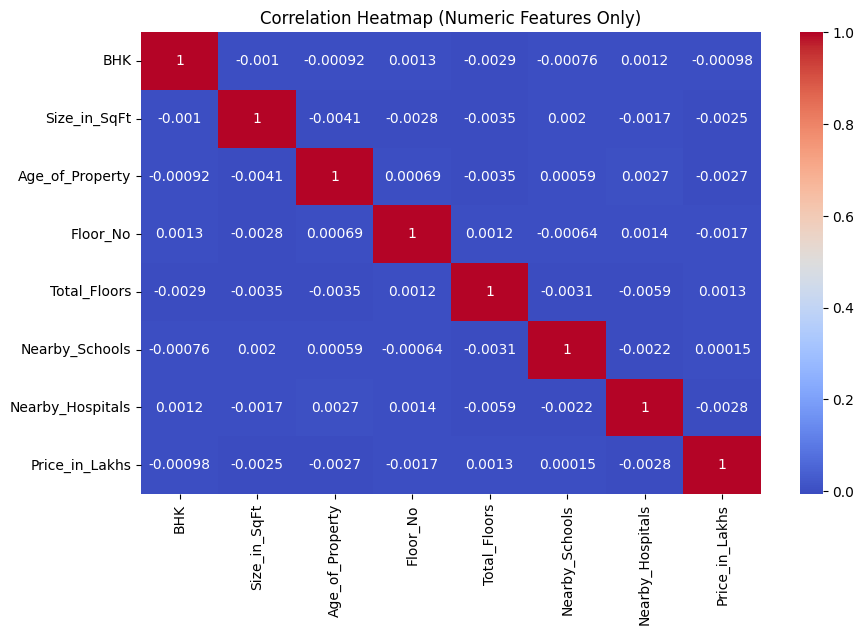

In [50]:
num_cols = [
    'BHK',
    'Size_in_SqFt',
    'Age_of_Property',
    'Floor_No',
    'Total_Floors',
    'Nearby_Schools',
    'Nearby_Hospitals'
]

plt.figure(figsize=(10,6))
sns.heatmap(
    df[num_cols + ['Price_in_Lakhs']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [51]:
high_card_cols = [
    col for col in categorical_cols
    if df[col].nunique() > 20
]
print(f'High Cardinality Categorical Columns: {high_card_cols}')

High Cardinality Categorical Columns: ['City', 'Locality', 'Amenities']


In [52]:
low_card_cols = [
    col for col in categorical_cols
    if df[col].nunique() <= 20
]
print(f'Low Cardinality Categorical Columns: {low_card_cols}')

Low Cardinality Categorical Columns: ['State', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Facing', 'Owner_Type', 'Availability_Status']


# Split data

In [53]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Price_in_Lakhs'])
y = df['Price_in_Lakhs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding

In [54]:
# Ordinal Encoding for Low Cardinality Columns
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[low_card_cols] = ord_encoder.fit_transform(X_train[low_card_cols])
X_test[low_card_cols] = ord_encoder.transform(X_test[low_card_cols])


In [55]:
# Target Enciding for High Cardinality Columns

target_mean = y_train.mean()         # Compute average house price across entire training data
print(f'Average House Price in Lakhs: {target_mean}')
for col in high_card_cols:
  mapping = X_train.groupby(col).apply(lambda x: y_train.loc[x.index].mean(), include_groups=False)

  X_train[col] = X_train[col].map(mapping)
  X_test[col] = X_test[col].map(mapping)

  # Handle unseen Categories
  X_train.fillna({col:target_mean}, inplace=True)
  X_test.fillna({col:target_mean}, inplace=True)

Average House Price in Lakhs: 25455491.575


In [56]:
# Create mappings dict for high cardinality columns
mappings_dict = {}

for col in high_card_cols:
    mappings_dict[col] = (
        df.loc[X_train.index]
        .groupby(col)['Price_in_Lakhs']
        .mean()
        .to_dict()
    )

joblib.dump(mappings_dict, "mappings.pkl")

['mappings.pkl']

In [57]:
print(X_train.shape, X_test.shape)
print(X_train.isnull().sum().sum())

(200000, 22) (50000, 22)
0


In [58]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [59]:
X_train.describe()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_per_SqFt,Year_Built,Furnished_Status,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
count,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000
mean,124858.693175,9.517640,2.545549e+07,2.545549e+07,1.004015,-0.000390,0.001970,0.369355,-0.028483,1.000455,...,0.028483,0.099958,0.099091,0.997605,0.498305,0.500190,2.545549e+07,1.505015,0.999235,0.500015
std,72152.773796,5.759575,2.010573e+05,7.006009e+05,0.816408,0.707866,0.577555,1.189289,0.577551,0.816540,...,0.577551,0.575793,0.574041,0.816292,0.499998,0.500001,5.255403e+05,1.118213,0.816516,0.500001
min,1.000000,0.000000,2.498632e+07,2.339918e+07,0.000000,-1.000000,-0.996448,-0.818182,-1.000000,0.000000,...,-0.941176,-0.800000,-0.800000,0.000000,0.000000,0.000000,2.376915e+07,0.000000,0.000000,0.000000
25%,62389.500000,5.000000,2.529536e+07,2.498386e+07,0.000000,-0.500000,-0.498668,-0.363636,-0.529412,0.000000,...,-0.470588,-0.400000,-0.400000,0.000000,0.000000,0.000000,2.519792e+07,1.000000,0.000000,0.000000
50%,124891.500000,10.000000,2.545301e+07,2.546500e+07,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.543782e+07,2.000000,1.000000,1.000000
75%,187319.250000,15.000000,2.557447e+07,2.592867e+07,2.000000,0.500000,0.501332,0.636364,0.470588,2.000000,...,0.529412,0.600000,0.600000,2.000000,1.000000,1.000000,2.567747e+07,3.000000,2.000000,1.000000
max,250000.000000,19.000000,2.590816e+07,2.817830e+07,2.000000,1.000000,1.001776,8.181818,0.941176,2.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.748635e+07,3.000000,2.000000,1.000000


In [60]:
X_train.shape, X_test.shape

((200000, 22), (50000, 22))

In [61]:
df['Price_in_Lakhs'].describe()

count    2.500000e+05
mean     2.545869e+07
std      1.413499e+07
min      1.000000e+06
25%      1.325500e+07
50%      2.538700e+07
75%      3.768800e+07
max      5.000000e+07
Name: Price_in_Lakhs, dtype: float64

In [62]:
df.rename(columns={"Price_in_Lakhs": "Price_INR"}, inplace=True)

# Model Training

Baseline Model

In [63]:
baseline_pred = np.full(shape=len(y_test), fill_value=y_train.mean())
print(baseline_pred)

[25455491.575 25455491.575 25455491.575 ... 25455491.575 25455491.575
 25455491.575]


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
baseline_mae = mean_absolute_error(y_test, baseline_pred)    # Calculate MAE
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))     # Calculate MSE
baseline_r2 = r2_score(y_test, baseline_pred)       # calculate R^2

print(f'Baseline MAE: {baseline_mae:0.2f}')
print(f'Baseline RMSE: {baseline_rmse:0.2f}')
print(f'Baseline R^2: {baseline_r2:0.2f}')

Baseline MAE: 12231777.64
Baseline RMSE: 14119324.01
Baseline R^2: -0.00


Linear Regression Model

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MAE: {lr_mae:0.2f}')
print(f'Linear Regression RMSE: {lr_rmse:0.2f}')
print(f'Linear Regression R^2: {lr_r2:0.2f}')

Linear Regression MAE: 8124991.46
Linear Regression RMSE: 101885966126318.08
Linear Regression R^2: 0.49


Random Forest Model

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators = 200,
    max_depth = 15,
    min_samples_split = 5,
    min_samples_leaf = 2,
    random_state = 42,
    n_jobs = -1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f'Random Forest MAE: {rf_mae:0.2f}')
print(f'Random Forest RMSE: {rf_rmse:0.2f}')
print(f'Random Forest R^2: {rf_r2:0.2f}')

Random Forest MAE: 688921.40
Random Forest RMSE: 780959221239.58
Random Forest R^2: 1.00


Model Comparison Table

In [67]:
results = pd.DataFrame({
    "Model" : ['Baseline', "Linear", "Random Forest"],
    "MAE" : [baseline_mae, lr_mae, rf_mae],
    "RMSE" : [baseline_rmse, lr_rmse, rf_rmse],
    "R2" : [baseline_r2, lr_r2, rf_r2]
 })
results

,Model,MAE,RMSE,R2
0,Baseline,1.223178e+07,1.411932e+07,-0.000001
1,Linear,8.124991e+06,1.018860e+14,0.488922
2,Random Forest,6.889214e+05,7.809592e+11,0.996083


📊 GRAPH 1 — Actual vs Predicted (Linear vs Random Forest)
🔹 What this graph shows

How close predictions are to real prices
Whether the model captures patterns or just noise

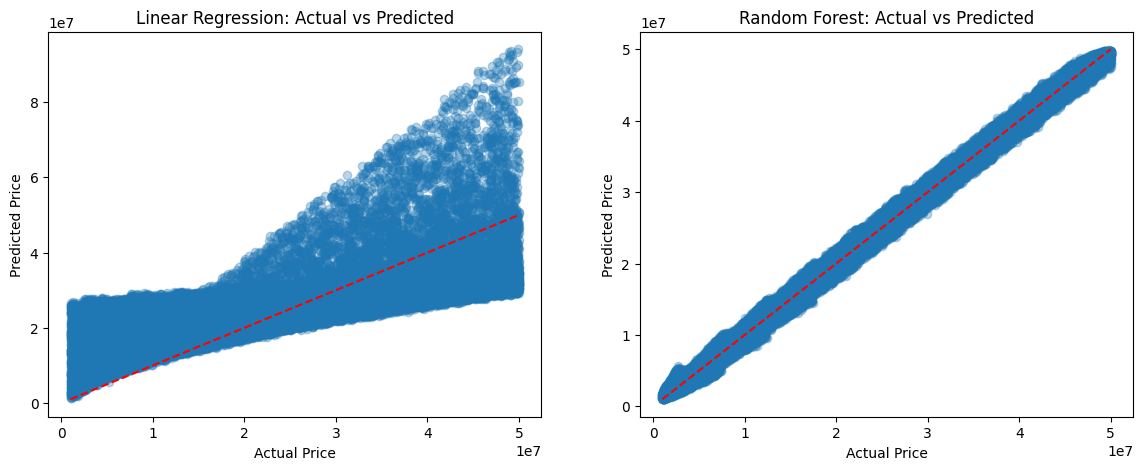

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

# Linear Regression
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

# Random Forest
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.show()


# Error Analysis & Model Validation

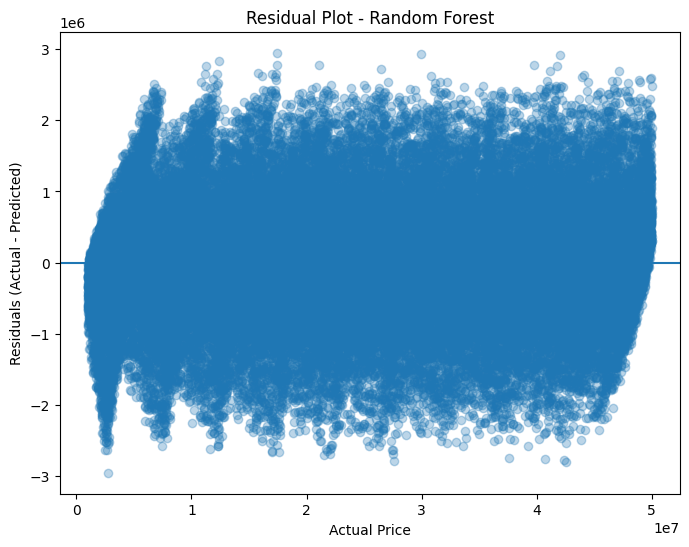

In [69]:
# Predictions
y_pred_rf = rf.predict(X_test)

# Residuals
residuals = y_test - y_pred_rf

# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, alpha=0.3)
plt.axhline(0)   # zero error line
plt.xlabel("Actual Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - Random Forest")
plt.show()

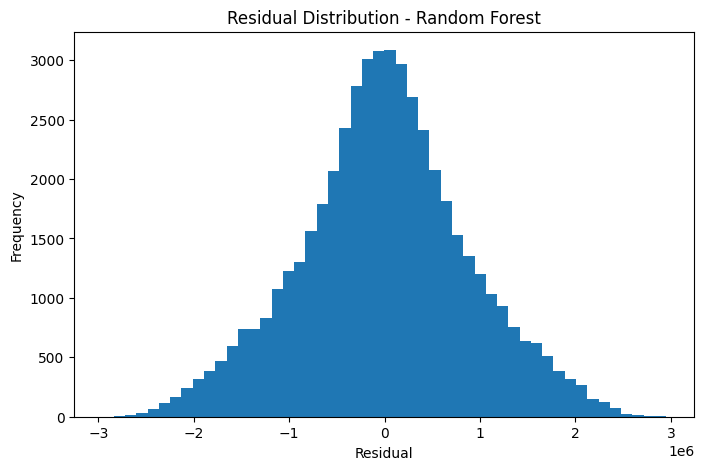

In [70]:
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=50)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution - Random Forest")
plt.show()

In [73]:
# Save the trained Random Forest model
joblib.dump(rf, 'rf_house_price_model.pkl')

# Also save the encoders and scaler for preprocessing
joblib.dump(ord_encoder, 'ordinal_encoder.pkl')
joblib.dump(scaler, 'robust_scaler.pkl')

# Save the target mean for high cardinality encoding
joblib.dump(target_mean, 'target_mean.pkl')

# Save the column lists
joblib.dump(low_card_cols, 'low_card_cols.pkl')
joblib.dump(high_card_cols, 'high_card_cols.pkl')
joblib.dump(numerical_cols, 'numerical_cols.pkl')


['numerical_cols.pkl']